In [1]:
!pip show tensorflow

In [2]:
!pip install --upgrade tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.1 MB 4.6 MB/s eta 0:01:22
   ---------------------------------------- 0.4/377.1 MB 4.6 MB/s eta 0:01:22
   ---------------------------------------- 0.6/377.1 MB 4.8 MB/s eta 0:01:18
   ---------------------------------------- 0.9/377.1 MB 5.1 MB/s eta 0:01:14
   ---------------------------------------- 1.1/377.1 MB 5.0 MB/s eta 0:01:16
   ---------------------------------------- 1.4/377.1 MB 5.4 MB/s eta 0:01:10
   ---------------------------------------- 1.8/377.1 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 2.1/377.1 MB 5.8 MB/s eta 0:01:05
   ---------------------------------------- 2.5/377

In [11]:
!pip install torch torchvision torchaudio

  Using cached torch-2.3.1-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.18.1-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/159.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.7 MB 991.0 kB/s eta 0:02:42
   ---------------------------------------- 0.4/159.7 MB 4.9 MB/s eta 0:00:33
   ---------------------------------------- 1.6/159.7 MB 12.6 MB/s eta 0:00:13
    --------------------------------------- 3.0/159.7 MB 17.4 MB/s eta 0:00:09
   - -------------------------------------- 5.2/159.7 MB 25.7 MB/s eta 0:00:07
   - -------------------------------------- 6.5/159.7 MB 24.4 MB/s eta 0:00:07
   -- ------------------------------------- 8.9/159.7 MB 29.9 MB/s eta 0:00:06
   -- ------------------------------------- 9.7/159.7 MB 29.5 MB/s eta 0:00:06
   -- ------------------------------------- 11.3/159.7 MB 34.4 MB/s eta 0:00:05
   --- ------------------------------------ 13.7/159.7 MB 38.5 MB/s e

In [15]:
!pip install numpy transformers

     ---------------------------------------- 0.0/43.6 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.6 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 43.6/43.6 kB 538.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
    --------------------------------------- 0.1/9.3 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.3 MB 4.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/9.3 MB 5.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.3 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.3 MB 5.9 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.3 MB 6.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/9.3 MB 6.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.3 MB 6.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/9.3 MB 5.7 MB/s eta 0:00:02
   ----------- 

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

每10个epoch save一遍model, save output, 用val generate一遍output, 最后跑完再用test data generate一遍（这个我觉得可以等我们觉得model效果ok了以后再跑，防止他memorize test data）--》 用作对比for qualitative and quantitative data

再对d loss和g loss都画个图

解决一下生成出来时黑白的问题

train func也得改改




In [12]:
main_dir = "D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN"
photo_train_dir = main_dir + '/photos_train_student_whiteBG'
photo_test_dir = main_dir + '/photos_test_student_whiteBG'
photo_val_dir = main_dir + '/photos_val_student_whiteBG'

sketch_train_dir = main_dir + '/sketch_train_studentSaved'
sketch_test_dir = main_dir + '/sketch_test_studentSaved'
sketch_val_dir = main_dir + '/sketch_val_studentSaved'

In [14]:
from torch.utils.data import Dataset
from PIL import Image
import os

class ImageFolderDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('jpg', 'png', 'jpeg'))]
        print(self.image_paths)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

In [21]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

import torchvision

# Load datasets
# photo_train_dataset = torchvision.datasets.ImageFolder(photo_train_dir, transform=transform)
# photo_test_dataset = torchvision.datasets.ImageFolder(photo_test_dir, transform=transform)
# photo_val_dataset = torchvision.datasets.ImageFolder(photo_val_dir, transform=transform)
# sketch_train_dataset = torchvision.datasets.ImageFolder(sketch_train_dir, transform=transform)
# sketch_test_dataset = torchvision.datasets.ImageFolder(sketch_test_dir, transform=transform)
# sketch_val_dataset = torchvision.datasets.ImageFolder(sketch_val_dir, transform=transform)

photo_train_dataset = ImageFolderDataset(photo_train_dir, transform=transform)
photo_test_dataset = ImageFolderDataset(photo_test_dir, transform=transform)
photo_val_dataset = ImageFolderDataset(photo_val_dir, transform=transform)
sketch_train_dataset = ImageFolderDataset(sketch_train_dir, transform=transform)
sketch_test_dataset = ImageFolderDataset(sketch_test_dir, transform=transform)
sketch_val_dataset = ImageFolderDataset(sketch_val_dir, transform=transform)

['D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_0.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_1.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_10.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_100.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_101.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_102.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_103.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_104.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_105.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/p

In [33]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# from torchvision import transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt


In [37]:

# Define the Generator
class UNetGenerator(nn.Module):
    def __init__(self, in_channels, out_channels, features=64):
        super(UNetGenerator, self).__init__()
        self.encoder = nn.Sequential(
            self.contract_block(in_channels, features, False),
            self.contract_block(features, features * 2),
            self.contract_block(features * 2, features * 4),
            self.contract_block(features * 4, features * 8),
        )
        self.decoder = nn.Sequential(
            self.expand_block(features * 8, features * 4),
            self.expand_block(features * 4, features * 2),
            self.expand_block(features * 2, features),
            nn.ConvTranspose2d(features, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def contract_block(self, in_channels, out_channels, use_bn=True):
        block = [nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)]
        if use_bn:
            block.append(nn.BatchNorm2d(out_channels))
        block.append(nn.ReLU(inplace=True))
        return nn.Sequential(*block)

    def expand_block(self, in_channels, out_channels):
        block = [
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        ]
        return nn.Sequential(*block)

# Define the Discriminator
class PatchDiscriminator(nn.Module):
    def __init__(self, in_channels, features=64):
        super(PatchDiscriminator, self).__init__()
        self.model = nn.Sequential(
            self.discriminator_block(in_channels * 2, features, False),
            self.discriminator_block(features, features * 2),
            self.discriminator_block(features * 2, features * 4),
            nn.Conv2d(features * 4, 1, kernel_size=3, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x, y):
        return self.model(torch.cat([x, y], dim=1))

    def discriminator_block(self, in_channels, out_channels, use_bn=True):
        block = [nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)]
        if use_bn:
            block.append(nn.BatchNorm2d(out_channels))
        block.append(nn.LeakyReLU(0.2, inplace=True))
        return nn.Sequential(*block)

# Training Loop
def train_gan(generator, discriminator, photo_dataloader, sketch_dataloader, val_dataloader, num_epochs=200, lambda_l1=100):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    generator = generator.to(device)
    discriminator = discriminator.to(device)

    criterion_gan = nn.BCELoss()
    criterion_l1 = nn.L1Loss()

    optimizer_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

    output_dir = main_dir + '/output'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    g_losses = []
    d_losses = []

    for epoch in range(num_epochs):
        for i, (photo_batch, sketch_batch) in enumerate(zip(photo_dataloader, sketch_dataloader)):
            photo_batch = photo_batch.to(device)
            sketch_batch = sketch_batch.to(device)
            
            # for debug only
            # print(photo_batch.size())
            # print(sketch_batch.size())

            # Train Discriminator
            optimizer_d.zero_grad()
            fake_sketch = generator(sketch_batch)
            real_validity = discriminator(photo_batch, sketch_batch)
            fake_validity = discriminator(photo_batch, fake_sketch.detach())

            real_loss = criterion_gan(real_validity, torch.ones_like(real_validity, device=device))
            fake_loss = criterion_gan(fake_validity, torch.zeros_like(fake_validity, device=device))
            d_loss = (real_loss + fake_loss)
            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            fake_validity = discriminator(photo_batch, fake_sketch)
            gan_loss = criterion_gan(fake_validity, torch.ones_like(fake_validity, device=device))
            l1_loss = criterion_l1(fake_sketch, photo_batch)
            g_loss = gan_loss + lambda_l1 * l1_loss
            g_loss.backward()
            optimizer_g.step()
            
            g_losses.append(g_loss.item())
            d_losses.append(d_loss.item())

            if i % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(photo_dataloader)} Loss D: {d_loss.item()}, loss G: {g_loss.item()}")
                

        # Save some generated images for visualization
        if epoch+1 % 10 == 0:
            # print(fake_sketch[0].size())
            save_image(fake_sketch[:25], f'{output_dir}/{epoch}_generated.png', nrow=5, normalize=True)
            torch.save(generator.state_dict(), f'{output_dir}/generator_epoch_{epoch}.pth')
            torch.save(discriminator.state_dict(), f'{output_dir}/discriminator_epoch_{epoch}.pth')

            # Generate output using validation data
            with torch.no_grad():
                for j, val_photo_batch in enumerate(val_dataloader):
                    val_photo_batch = val_photo_batch.to(device)
                    val_fake_sketch = generator(val_photo_batch)
                    save_image(val_fake_sketch, f'{output_dir}/{epoch}_val_generated_{j}.png', nrow=5, normalize=True)
                    if j == 0:
                        break
                    
    plt.figure(figsize=(10, 5))
    plt.plot(g_losses, label='G Loss')
    plt.plot(d_losses, label='D Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{output_dir}/loss_plot.png')
    plt.show()




In [43]:
!pip install matplotlib

['D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_0.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_1.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_10.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_100.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_101.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_102.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_103.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_104.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/photos_train_student_whiteBG\\target_105.jpg', 'D:/APS360/Baseline_Model/APS360_Group18_SketchToFace_GAN/p

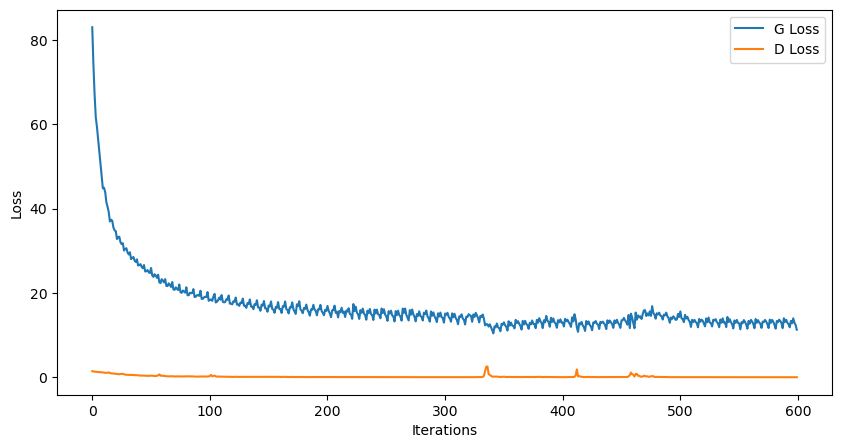

In [41]:
# Load datasets
photo_train_dataset = ImageFolderDataset(photo_train_dir, transform=transform)
photo_test_dataset = ImageFolderDataset(photo_test_dir, transform=transform)
photo_val_dataset = ImageFolderDataset(photo_val_dir, transform=transform)
sketch_train_dataset = ImageFolderDataset(sketch_train_dir, transform=transform)
sketch_test_dataset = ImageFolderDataset(sketch_test_dir, transform=transform)
sketch_val_dataset = ImageFolderDataset(sketch_val_dir, transform=transform)

photo_train_loader = DataLoader(photo_train_dataset, batch_size=32, shuffle=False)
photo_val_loader = DataLoader(photo_val_dataset, batch_size=32, shuffle=False)
photo_test_loader = DataLoader(photo_test_dataset, batch_size=32, shuffle=False)

# sketch
sketch_train_loader = DataLoader(sketch_train_dataset, batch_size=32, shuffle=False)
sketch_val_loader = DataLoader(sketch_val_dataset, batch_size=32, shuffle=False)
sketch_test_loader = DataLoader(sketch_test_dataset, batch_size=32, shuffle=False)

# sample_batch = next(iter(photo_train_loader))
# sample_batch2 = next(iter(sketch_train_loader))

# x = sample_batch
# x1 = sample_batch2
# print(x.shape)
# print(x1.shape)

# print(x.dtype)
# print(x1.dtype)

# for i in range(min(len(x), len(x1))):
#     print(f"Shape of photo sample {i}: {x[i].shape}")
#     print(f"Shape of sketch sample {i}: {x1[i].shape}")

# #set batchsize to corresponded batch size of val/train loader
# fig, axes = plt.subplots(8, 2, figsize=(10, 10))
# for i in range(8):
#         axes[i, 0].imshow(x[i].permute(1, 2, 0))
#         axes[i, 0].set_title('Target Image')
#         axes[i, 0].axis('off')
#         axes[i, 1].imshow(x1[i].permute(1, 2, 0))
#         axes[i, 1].set_title('Sketch Image')
#         axes[i, 1].axis('off')
        
   
# plt.tight_layout()
# plt.show()

# Initialize models
generator = UNetGenerator(in_channels=3, out_channels=3)
discriminator = PatchDiscriminator(in_channels=3)

# Train the model
train_gan(generator, discriminator, photo_train_loader, sketch_train_loader, photo_val_loader, num_epochs=100)

In [42]:
# test the model:

def load_checkpoint(checkpoint_file, model, optimizer, lr):
    print("=> Loading checkpoint")
    checkpoint = torch.load(checkpoint_file, map_location=config.DEVICE)
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    # If we don't do this then it will just have learning rate of old checkpoint
    # and it will lead to many hours of debugging :
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

    if config.LOADMODEL:
        load_checkpoint(config.CHECKPOINT_GEN, gen, optimizer_gen, config.LEARNING_RATE)
        load_checkpoint(config.CHECKPOINT_DISC, disc, optimizer_disc, config.LEARNING_RATE)
        load_checkpoint(config.CHECKPOINT_GEN2, gen2, optimizer_gen2, config.LEARNING_RATE)


    test_dataset = MapDataset_Multi(sketch_dir='test/sketch_crop', target_dir='test/photo_bright')
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
    print("Test dataset loaded")

    if config.TEST_ONLY and config.LOAD_MODEL:

        name = "Multi_FirstTrial"
        if not os.path.exists(f"Final_Generation/g{name}"):
            os.makedirs(f"FinalGeneration/g{name}")
        finalsave_all(gen, gen2, test_loader, folderName=f"Final_Generation/g{name}")

        exit()


# L1 L2, MAE

In [43]:
# SSIM
# 脸的轮廓match不match

# take in target and generated img
